In [1]:
pip install ffmpeg

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.


In [23]:
import ffmpeg

def get_video_info(video_path):
    try:
        probe = ffmpeg.probe(video_path)
        video_info = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')
        return {
            'width': video_info['width'],
            'height': video_info['height'],
            'duration': float(video_info['duration']),
            'frame_rate': eval(video_info['r_frame_rate']),
            'nb_frames': int(video_info['nb_frames']),
        }
    except ffmpeg.Error as e:
        print(f"Error: {e.stderr.decode('utf8')}")
        return None

# Example usage
video_path = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/ima.mp4'
info = get_video_info(video_path)
if info:
    print("Video Information:")
    print(f"Width: {info['width']} pixels")
    print(f"Height: {info['height']} pixels")
    print(f"Duration: {info['duration']} seconds")
    print(f"Frame Rate: {info['frame_rate']} fps")
    print(f"Number of Frames: {info['nb_frames']}")
    
    

Video Information:
Width: 2562 pixels
Height: 1440 pixels
Duration: 10.51 seconds
Frame Rate: 29.97002997002997 fps
Number of Frames: 315


In [7]:
pip install ffprobe


Note: you may need to restart the kernel to use updated packages.


Frame Counts: {'I': 5, 'P': 89, 'B': 221}
Frame Percentages: {'I': 1.5873015873015872, 'P': 28.253968253968253, 'B': 70.15873015873015}


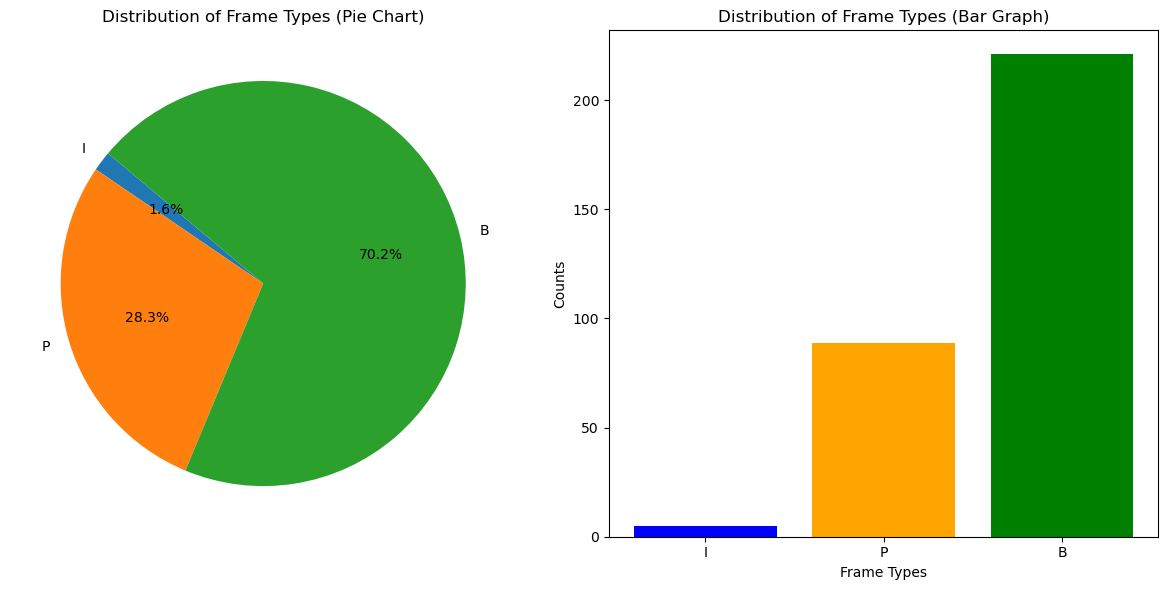

In [25]:
import subprocess
import json
import matplotlib.pyplot as plt

# Define the input video file
input_video = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/ima.mp4'

# Function to probe video file using subprocess
def probe_video(file):
    try:
        result = subprocess.run(
            [
                'ffprobe',
                '-v', 'error',
                '-select_streams', 'v:0',
                '-show_entries', 'frame=pict_type',
                '-of', 'json',
                file
            ],
            capture_output=True,
            text=True,
            check=True
        )
        return json.loads(result.stdout)
    except subprocess.CalledProcessError as e:
        print(f"Error running ffprobe: {e.stderr}")
        return None

# Extract frame type information using ffprobe
frame_info = probe_video(input_video)

if frame_info:
    frames = frame_info['frames']

    # Initialize counters
    frame_counts = {'I': 0, 'P': 0, 'B': 0}

    # Count frame types
    for frame in frames:
        if 'pict_type' in frame:
            frame_type = frame['pict_type']
            if frame_type in frame_counts:
                frame_counts[frame_type] += 1

    # Calculate total frames and percentages
    total_frames = sum(frame_counts.values())

    if total_frames > 0:
        frame_percentages = {key: (value / total_frames) * 100 for key, value in frame_counts.items()}
    else:
        frame_percentages = {key: 0 for key in frame_counts.keys()}

    # Print results
    print("Frame Counts:", frame_counts)
    print("Frame Percentages:", frame_percentages)

    # Plot the distribution using matplotlib
    plt.figure(figsize=(12, 6))

    # Pie chart
    plt.subplot(1, 2, 1)
    plt.pie(frame_percentages.values(), labels=frame_percentages.keys(), autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Frame Types (Pie Chart)')

    # Bar graph
    plt.subplot(1, 2, 2)
    plt.bar(frame_counts.keys(), frame_counts.values(), color=['blue', 'orange', 'green'])
    plt.title('Distribution of Frame Types (Bar Graph)')
    plt.xlabel('Frame Types')
    plt.ylabel('Counts')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [27]:
import subprocess
import os

# Define the input video file and output directory
input_video = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/ima.mp4'
output_dir = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/frames/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to extract frames of a specific type (I, P, or B)
def extract_frames(frame_type):
    subprocess.run(
        [
            'ffmpeg',
            '-i', input_video,
            '-vf', f'select=eq(pict_type\\,{frame_type})',
            '-vsync', 'vfr',
            os.path.join(output_dir, f'{frame_type}_frame_%03d.png')
        ],
        check=True
    )

# Extract I, P, and B frames
extract_frames('I')
extract_frames('P')
extract_frames('B')


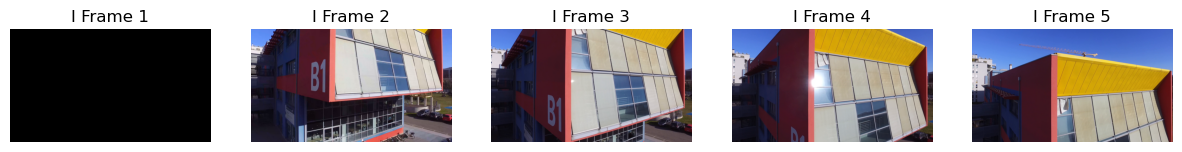

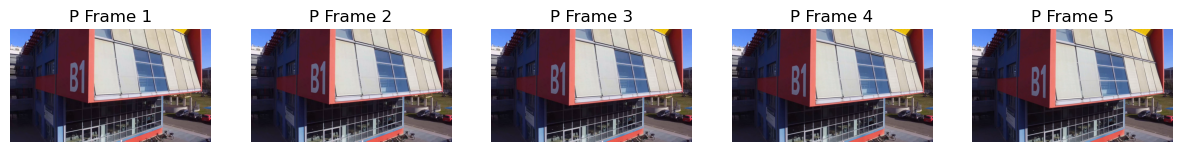

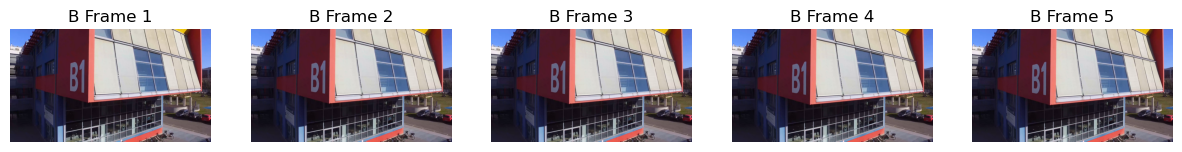

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import glob

# Function to load and display frames of a specific type
def display_frames(frame_type):
    # Get the list of image files
    frame_files = glob.glob(os.path.join(output_dir, f'{frame_type}_frame_*.png'))

    # Display the frames
    plt.figure(figsize=(15, 5))
    for i, frame_file in enumerate(frame_files[:5], 1):  # Display up to 5 frames
        img = Image.open(frame_file)
        plt.subplot(1, 5, i)
        plt.imshow(img)
        plt.title(f'{frame_type} Frame {i}')
        plt.axis('off')
    plt.show()

# Display I, P, and B frames
display_frames('I')
display_frames('P')
display_frames('B')


Average I Frame Size: 2108741.20 bytes
Average P Frame Size: 1263764.40 bytes
Average B Frame Size: 3015835.17 bytes


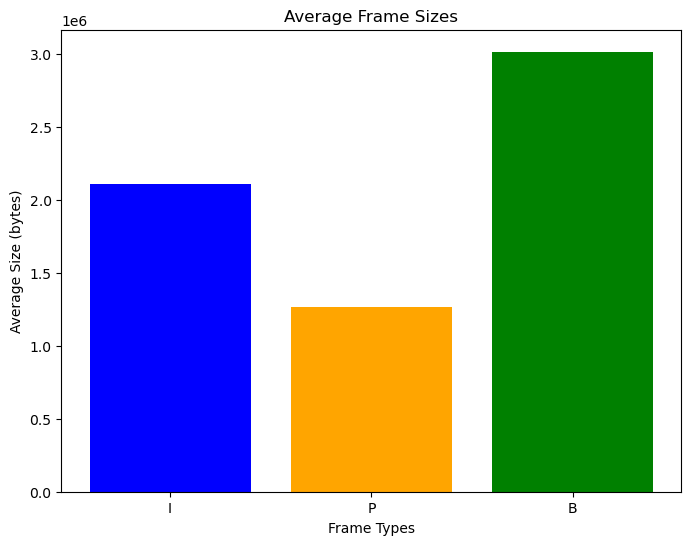

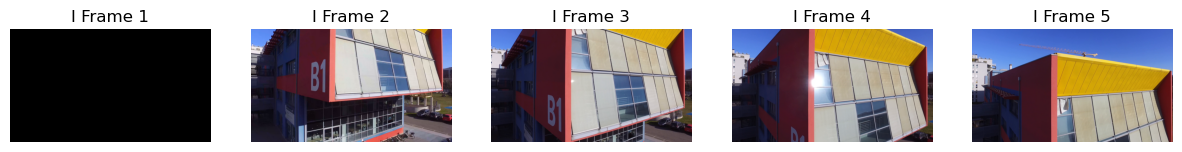

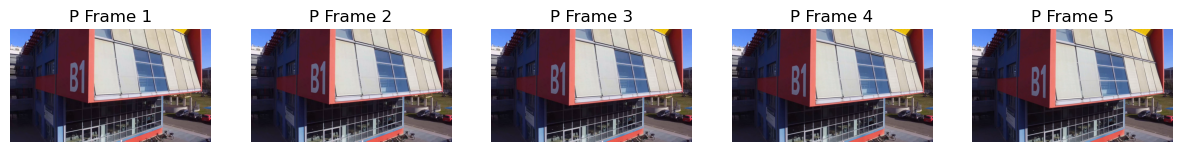

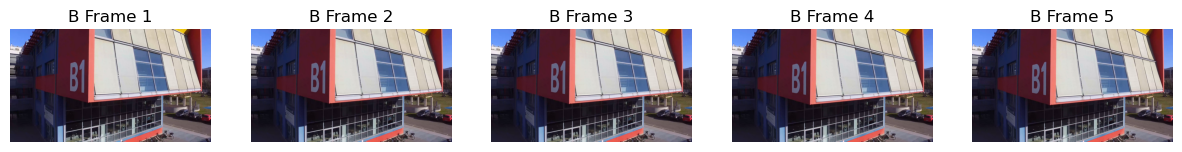

In [31]:
import subprocess
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the input video file and output directory
input_video = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/ima.mp4'
output_dir = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/frames/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to extract frames of a specific type (I, P, or B)
def extract_frames(frame_type):
    subprocess.run(
        [
            'ffmpeg',
            '-i', input_video,
            '-vf', f'select=eq(pict_type\\,{frame_type})',
            '-vsync', 'vfr',
            os.path.join(output_dir, f'{frame_type}_frame_%03d.png')
        ],
        check=True
    )

# Extract I, P, and B frames
extract_frames('I')
extract_frames('P')
extract_frames('B')

# Function to calculate file sizes of frames of a specific type
def calculate_frame_sizes(frame_type):
    frame_files = glob.glob(os.path.join(output_dir, f'{frame_type}_frame_*.png'))
    file_sizes = [os.path.getsize(frame) for frame in frame_files]
    return file_sizes

# Calculate frame sizes for I, P, and B frames
i_frame_sizes = calculate_frame_sizes('I')
p_frame_sizes = calculate_frame_sizes('P')
b_frame_sizes = calculate_frame_sizes('B')

# Calculate average frame sizes
average_i_frame_size = np.mean(i_frame_sizes)
average_p_frame_size = np.mean(p_frame_sizes)
average_b_frame_size = np.mean(b_frame_sizes)

# Print results
print(f"Average I Frame Size: {average_i_frame_size:.2f} bytes")
print(f"Average P Frame Size: {average_p_frame_size:.2f} bytes")
print(f"Average B Frame Size: {average_b_frame_size:.2f} bytes")

# Plot the average frame sizes using matplotlib
plt.figure(figsize=(8, 6))
frame_types = ['I', 'P', 'B']
average_sizes = [average_i_frame_size, average_p_frame_size, average_b_frame_size]

plt.bar(frame_types, average_sizes, color=['blue', 'orange', 'green'])
plt.title('Average Frame Sizes')
plt.xlabel('Frame Types')
plt.ylabel('Average Size (bytes)')
plt.show()

# Function to load and display frames of a specific type
def display_frames(frame_type):
    # Get the list of image files
    frame_files = glob.glob(os.path.join(output_dir, f'{frame_type}_frame_*.png'))

    # Display the frames
    plt.figure(figsize=(15, 5))
    for i, frame_file in enumerate(frame_files[:5], 1):  # Display up to 5 frames
        img = Image.open(frame_file)
        plt.subplot(1, 5, i)
        plt.imshow(img)
        plt.title(f'{frame_type} Frame {i}')
        plt.axis('off')
    plt.show()

# Display I, P, and B frames
display_frames('I')
display_frames('P')
display_frames('B')


In [33]:
import subprocess
import os
import glob
from PIL import Image
import cv2

# Define the input video file and output directory
input_video = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/ima.mp4'
output_dir = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/frames/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to extract I frames
def extract_i_frames():
    subprocess.run(
        [
            'ffmpeg',
            '-i', input_video,
            '-vf', 'select=eq(pict_type\,I)',
            '-vsync', 'vfr',
            os.path.join(output_dir, 'I_frame_%03d.png')
        ],
        check=True
    )

# Extract I frames
extract_i_frames()

# Define the output video file path
output_video = '/Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/reconstructed_video.mp4'

# Get the list of I frame files
i_frame_files = sorted(glob.glob(os.path.join(output_dir, 'I_frame_*.png')))

# Read the first frame to get the video properties
frame = cv2.imread(i_frame_files[0])
height, width, layers = frame.shape

# Define the video writer with reduced frame rate (e.g., 1 fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video, fourcc, 1, (width, height))

# Write each I frame to the output video
for frame_file in i_frame_files:
    frame = cv2.imread(frame_file)
    video_writer.write(frame)

# Release the video writer
video_writer.release()

print("Reconstructed video saved at:", output_video)


<>:20: SyntaxWarning: invalid escape sequence '\,'
<>:20: SyntaxWarning: invalid escape sequence '\,'
C:\Users\madha\AppData\Local\Temp\ipykernel_7536\2284809309.py:20: SyntaxWarning: invalid escape sequence '\,'
  '-vf', 'select=eq(pict_type\,I)',


Reconstructed video saved at: /Users/madha/OneDrive/Desktop/fall sem 2024/image and video analytics/reconstructed_video.mp4
